# Homework 5, problem 10.2
* Write a function [W,R] = house(A) that computes an implicit representation of a full QR factorization $A=QR$ of an $m \times n$ matrix $A$ with $m\ge n$ using Householder reflections.  The output variables are a lower-triangular matrix $W\in \mathbb{C}^{m\times n}$ whose columns are the vectors $v_k$ defining the successive Householder reflections, and a triangular matrix $\mathbb{R}\in \mathbb{C}^{n\times n}$.
* Write a function Q = formQ(W) that takes the matrix $W$ produced by part (1) as input and generates a corresponding $m\times m$ orthogonal matrix $Q$.

In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt

# set image parameters
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams['figure.dpi'] = 80

plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'

In [35]:
def getH(A):
    if np.any(np.iscomplex(A)):
        return(np.conjugate(A).T)
    else:
        return(A.T)

In [119]:
def house(A):
    m,n = A.shape
    B = np.zeros((m,n))+A
    W = np.zeros((m,n))
    for kk in range(n):
        x = B[kk:m,kk].reshape((m-kk,1))
        e1 = np.zeros((m-kk,1))
        e1[0]=1
        v_k = np.zeros((m-kk,1))
        v_k = np.sign(x[0])*np.linalg.norm(x)*e1+x
        v_k = v_k/np.linalg.norm(v_k)
        W[kk:m,kk] = v_k.reshape((len(v_k)))
        B[kk:m,kk:n] -= 2*v_k@(getH(v_k)@B[kk:m,kk:n])
    return(W,B)

def formQ(W):
    m,n = W.shape
    Q = np.identity(m)
    for jj in range(m):
        for kk in range(n)[::-1]:
            v_k = W[kk:m,kk].reshape(((m-kk,1)))
            Q[kk:m,jj] -= 2*v_k@(getH(v_k)@Q[kk:m,jj])
    return(Q)

# Test the QR function

### Visualize the error in the QR algorithm by plotting a heatmap of 
$$\big|QR-A\big|.$$

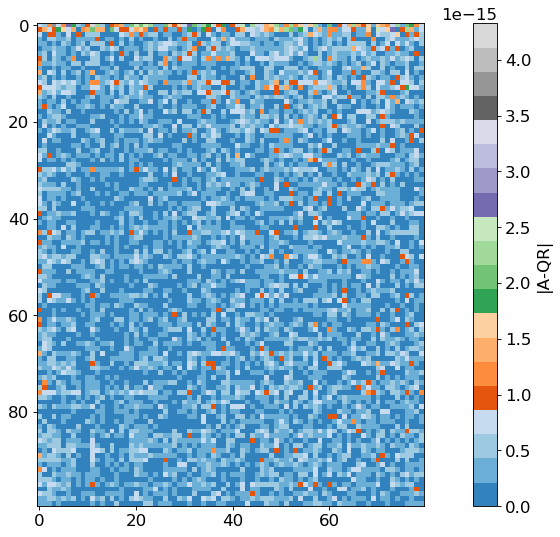

In [131]:
# Define the dimensions of $ A $, must have $ m \ge n $
m , n = 100, 80 
A = np.random.rand(m,n)
W,R = house(A)
Q = formQ(W)
plt.imshow(np.abs(Q@R-A),cmap='tab20c')
plt.colorbar(label='|A-QR|')
plt.legend()
plt.show()

## Visualize how the QR algorithm error scales with dimension.
### Procedure:
* Get a random square matrix A of size n
* Use mgs to find QR decomposition
* For each n, do this multiple times
* Do this for dimension n ranging from 1,1000 

In [136]:
# define the dimensions we're testing over
nTests = [5,10,50,100,500,1000]
# define the number of trials per n dimension
nIter = 20

# Set up QR error results
QR_Err = np.zeros((nIter,len(nTests)))
# Set up Q^*Q=I error results
QTQ_Err = np.zeros((nIter,len(nTests)))

for jj,n in enumerate(nTests):
    for kk in range(nIter):
        A = np.random.rand(n,n)
        W,R = house(A)
        Q = formQ(W)
        QR_Err[kk,jj]=np.linalg.norm(Q@R-A)
        QTQ_Err[kk,jj]=np.linalg.norm(Q.T@Q-np.identity(n))
    print('\n Dimension: ',n)
    print('Mean QR error: ',np.mean(QR_Err[:,jj]))
    print('Mean $Q^*Q=I$ error: ',np.mean(QTQ_Err[:,jj]))


 Dimension:  5
Mean QR error:  1.66537746904e-15
Mean $Q^*Q=I$ error:  1.14986822327e-15

 Dimension:  10
Mean QR error:  2.64740216946e-15
Mean $Q^*Q=I$ error:  1.81483130856e-15

 Dimension:  50
Mean QR error:  1.66820350125e-14
Mean $Q^*Q=I$ error:  5.19616348255e-15

 Dimension:  100
Mean QR error:  4.29079195997e-14
Mean $Q^*Q=I$ error:  8.66758254678e-15

 Dimension:  500
Mean QR error:  3.76037199254e-13
Mean $Q^*Q=I$ error:  3.32216719469e-14

 Dimension:  1000
Mean QR error:  9.93484569853e-13
Mean $Q^*Q=I$ error:  6.23382364531e-14


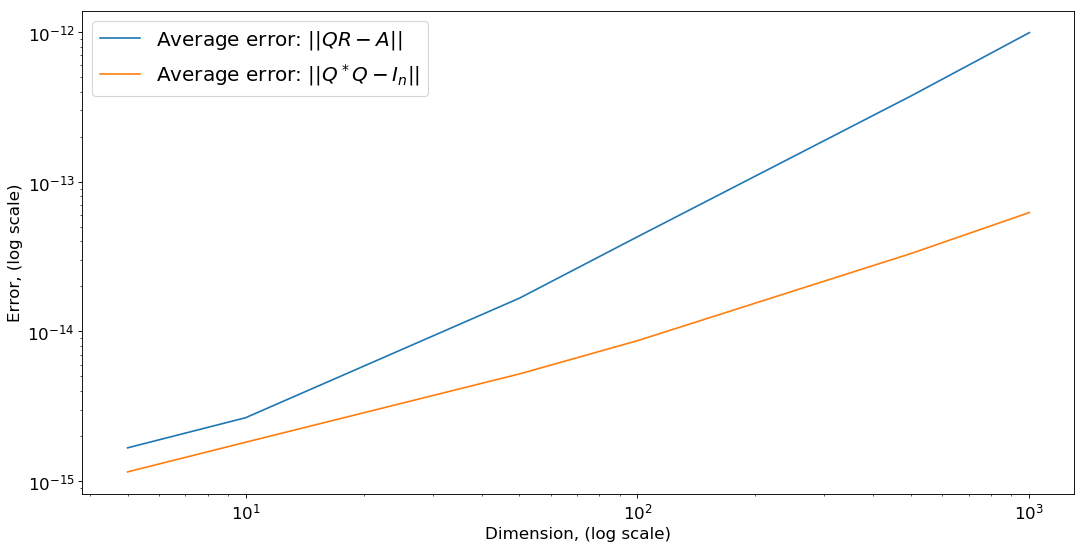

In [137]:
plt.plot(nTests, np.mean(QR_Err,axis=0),label='Average error: $||QR-A||$')
plt.plot(nTests, np.mean(QTQ_Err,axis=0),label='Average error: $||Q^*Q-I_n||$')
plt.xlabel('Dimension, (log scale)')
plt.ylabel('Error, (log scale)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()